# Competition 2 
## Name: **OyWithThePoodles**
----------------------------------------------------
## Results: 

**MSE** : 0.65

**R2** : 29% 

----------------------------------------------------

|MODEL|CV|MSE|R2|Score
|------|------|------|------|-------|
|MultiLasso-trainingSet|5|1.01|22%|0.26|
|MultiLasso-trainingSet|10|0.79|25%|0.25|
|MultiLasso-testSet|10|0.65|29%|0.29|

## in more detail:

------TRAINSET.-------

**MSE for MultiLasso CV=5 w/ 11 features**:  1.01 

**R2 for MultiLasso CV=5 w/ 11 features**:  0.22

**Multilasso cv non linear & 11 features score for train set**:  0.25826562010269694

------TRAINSET.-------

**MSE for MultiLasso CV w/ 11 features**:  0.7880767777427273

**R2 for MultiLasso CV w/ 11 features**:  0.249500308161679

**Multilasso cv non linear & 11 features score for train set**:  0.2466158848161475


---------------------------------------------------------------------------

------TESTSET.-------

**MSE for MultiLasso CV w/ 11 features test set**:  0.6456986796471738

**R2 for MultiLasso CV=10 w/ 11 features test set**:  0.28912755287258507

**Multilasso cv non linear & 11 features score for test set**:  0.28912755287258507

    
# The following Cell includes the image for Q2. 
## The code for generating image was submitted in Submission 1
    


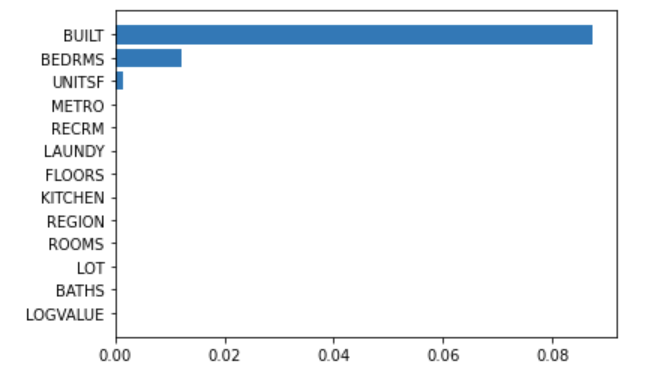

In [37]:
from IPython.display import Image
Image("pic.png")

In [21]:
#read data - training 
#train model
#talk about results 
#add the graph of weights 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from patsy import dmatrices


dt = pd.read_csv('trainset.csv') #training set 

#fix normality issues with unitsf 
unitsf = np.array(dt['UNITSF'])

transformer = PowerTransformer()
unitsf = transformer.fit(unitsf.reshape(-1,1)).transform(unitsf.reshape(-1,1))

unitsf = unitsf.flatten() 

#put this back into the dataframe 
unitsf = pd.Series(unitsf)
dt['UNITSF'] = unitsf.values

print(dt.head())


y, X = dmatrices('LOGVALUE ~ BATHS + BEDRMS + BUILT + np.log(UNITSF) + ROOMS + REGION + KITCHEN + np.log(FLOORS) + LAUNDY + METRO3 + ROOMS:BEDRMS', dt)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0)

lasso_model = MultiTaskLassoCV(cv = 10, random_state = 42).fit(X_train, y_train)
print("---------------------------------------------------------------------------")
print("Multilasso cv non linear & 11 features score for train set: ", lasso_model.score(X_train, y_train))
print("Multilasso cv non linear & 11 features score for validation set: ", lasso_model.score(X_val, y_val))
print("---------------------------------------------------------------------------")


lasso_pred = lasso_model.predict(X_val)
msetrain = mean_squared_error(y_val, lasso_pred)
r2train = r2_score(y_val, lasso_pred)

print("MSE for MultiLasso CV w/ 11 features: ", msetrain)
print("R2 for MultiLasso CV w/ 11 features: ", r2train)

    LOGVALUE  BATHS  BEDRMS  BUILT    UNITSF      LOT  ROOMS  REGION  KITCHEN  \
0  12.899220      2       3   2001 -0.446943   2712.0      6       4        1   
1  11.225243      1       3   1975 -1.081004  11000.0      5       3        1   
2  11.561716      2       3   1995 -0.779099  44000.0      5       3        1   
3  13.122363      4       5   2001  2.466481  11000.0     11       4        1   
4  11.891362      2       4   1990 -0.945265  11000.0      7       2        1   

   FLOORS  LAUNDY  RECRM  METRO  METRO3  
0       2       0      0      7       2  
1       1       0      0      1       1  
2       1       0      0      7       2  
3       2       0      0      7       2  
4       4       0      0      7       2  


C:\Users\yamirkha\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


---------------------------------------------------------------------------
Multilasso cv non linear & 11 features score for train set:  0.2466158848161475
Multilasso cv non linear & 11 features score for validation set:  0.249500308161679
---------------------------------------------------------------------------
MSE for MultiLasso CV w/ 11 features:  0.7880767777427273
R2 for MultiLasso CV w/ 11 features:  0.249500308161679


In [22]:
#read data - test set 
dtest = pd.read_csv('testset.csv')
dtest.head()

,LOGVALUE,BATHS,BEDRMS,BUILT,UNITSF,LOT,ROOMS,REGION,KITCHEN,FLOORS,LAUNDY,RECRM,METRO,METRO3
0,12.345835,2,3,1919,1300.0,15900.0,7,1,1,3,0,0,7,2
1,13.122363,3,4,1960,3000.0,44000.0,10,3,1,2,0,0,7,9
2,12.429216,1,3,1975,3100.0,44000.0,7,2,1,3,0,0,7,2
3,12.154779,1,2,1940,1480.0,2450.0,4,4,1,2,0,0,1,1
4,11.156251,2,3,2000,1200.0,11000.0,6,3,1,2,0,0,7,2


In [23]:
#explore data 
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOGVALUE  10001 non-null  float64
 1   BATHS     10001 non-null  int64  
 2   BEDRMS    10001 non-null  int64  
 3   BUILT     10001 non-null  int64  
 4   UNITSF    10001 non-null  float64
 5   LOT       10001 non-null  float64
 6   ROOMS     10001 non-null  int64  
 7   REGION    10001 non-null  int64  
 8   KITCHEN   10001 non-null  int64  
 9   FLOORS    10001 non-null  int64  
 10  LAUNDY    10001 non-null  int64  
 11  RECRM     10001 non-null  int64  
 12  METRO     10001 non-null  int64  
 13  METRO3    10001 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 1.1 MB


In [25]:
#descriptions 
dtest.describe()

,LOGVALUE,BATHS,BEDRMS,BUILT,UNITSF,LOT,ROOMS,REGION,KITCHEN,FLOORS,LAUNDY,RECRM,METRO,METRO3
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000
mean,12.068434,1.910909,3.213979,1970.696230,2314.758057,43353.967529,6.578042,2.846815,1.004700,1.920808,0.390361,0.074293,5.657634,1.887211
std,1.033178,0.775604,0.873733,25.602666,1845.867728,111834.123680,1.660582,1.004655,0.068395,1.037655,0.537962,0.270518,2.468476,1.017486
min,0.000000,0.000000,0.000000,1919.000000,99.000000,200.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,11.580584,1.000000,3.000000,1950.000000,1420.000000,6000.000000,5.000000,2.000000,1.000000,1.000000,0.000000,0.000000,7.000000,2.000000
50%,12.100712,2.000000,3.000000,1975.000000,2000.000000,11000.000000,6.000000,3.000000,1.000000,2.000000,0.000000,0.000000,7.000000,2.000000
75%,12.611538,2.000000,4.000000,1990.000000,2500.000000,43925.933653,8.000000,4.000000,1.000000,2.000000,1.000000,0.000000,7.000000,2.000000
max,15.476535,7.000000,8.000000,2011.000000,20159.000000,933185.000000,15.000000,4.000000,2.000000,21.000000,4.000000,2.000000,7.000000,9.000000


In [29]:
#fix any data issues 
#normalizing unitsf
test_unitSF = dtest['UNITSF']

test_unitSF = np.array(test_unitSF)
test_unitSF = transformer.fit(test_unitSF.reshape(-1,1)).transform(test_unitSF.reshape(-1,1))

test_unitSF = test_unitSF.flatten() 

#put this back into the dataframe 
test_unitSF = pd.Series(test_unitSF)
dtest['UNITSF'] = test_unitSF.values


#getting rid of the unnecessary columns 
# columns_to_drop = dtest[['LOT','METRO']]

# dtest.drop(['LOT','METRO'], axis=1)
dtest = dtest.drop(columns=['LOT', 'METRO'])

dtest.head()

,LOGVALUE,BATHS,BEDRMS,BUILT,UNITSF,ROOMS,REGION,KITCHEN,FLOORS,LAUNDY,RECRM,METRO3
0,12.345835,2,3,1919,-0.768741,7,1,1,3,0,0,2
1,13.122363,3,4,1960,0.816024,10,3,1,2,0,0,9
2,12.429216,1,3,1975,0.874744,7,2,1,3,0,0,2
3,12.154779,1,2,1940,-0.511633,4,4,1,2,0,0,1
4,11.156251,2,3,2000,-0.929589,6,3,1,2,0,0,2


In [31]:
#making sure there are no issues: 
print(dtest.describe())
print("----------------------------------------------------------------------")
print(dtest.info())

           LOGVALUE         BATHS        BEDRMS         BUILT        UNITSF  \
count  10001.000000  10001.000000  10001.000000  10001.000000  1.000100e+04   
mean      12.068434      1.910909      3.213979   1970.696230  6.578801e-17   
std        1.033178      0.775604      0.873733     25.602666  1.000050e+00   
min        0.000000      0.000000      0.000000   1919.000000 -6.848999e+00   
25%       11.580584      1.000000      3.000000   1950.000000 -5.932209e-01   
50%       12.100712      2.000000      3.000000   1975.000000  6.902520e-02   
75%       12.611538      2.000000      4.000000   1990.000000  4.849597e-01   
max       15.476535      7.000000      8.000000   2011.000000  3.849592e+00   

              ROOMS        REGION       KITCHEN        FLOORS        LAUNDY  \
count  10001.000000  10001.000000  10001.000000  10001.000000  10001.000000   
mean       6.578042      2.846815      1.004700      1.920808      0.390361   
std        1.660582      1.004655      0.068395    

Count of UNITSF is now 1.000100e+04. This is a bit problematic. 

In [32]:
#looking into it: 
print(len(dtest['UNITSF']))

10001


In [35]:
#count doesn't include NA values... so there must be something missing! 

print(dtest['UNITSF'].isnull().values.any())
print(dtest['UNITSF'].isnull().values.all())

False
False


Since there aren't any values that are NA, I'll just move on. 

In [36]:
#run model on test set 
ytest, Xtest = dmatrices('LOGVALUE ~ BATHS + BEDRMS + BUILT + np.log(UNITSF) + ROOMS + REGION + KITCHEN + np.log(FLOORS) + LAUNDY + METRO3 + ROOMS:BEDRMS', dtest)

lasso_model_ontest = MultiTaskLassoCV(cv = 10, random_state = 42).fit(Xtest, ytest)
print("---------------------------------------------------------------------------")
print("Multilasso cv non linear & 11 features score for test set: ", lasso_model_ontest.score(Xtest, ytest))
print("---------------------------------------------------------------------------")


lasso_pred_ontest = lasso_model_ontest.predict(Xtest)
msetrain_ontest = mean_squared_error(ytest, lasso_pred_ontest)
r2train_ontest = r2_score(ytest, lasso_pred_ontest)

print("MSE for MultiLasso CV w/ 11 features test set: ", msetrain_ontest)
print("R2 for MultiLasso CV w/ 11 features test set: ", r2train_ontest)

C:\Users\yamirkha\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


---------------------------------------------------------------------------
Multilasso cv non linear & 11 features score for test set:  0.28912755287258507
---------------------------------------------------------------------------
MSE for MultiLasso CV w/ 11 features test set:  0.6456986796471738
R2 for MultiLasso CV w/ 11 features test set:  0.28912755287258507
